In [2]:
import numpy as np
from matplotlib import pyplot as plt
from astropy import units as u
#from astropy.cosmology import units as cu
from astropy import constants as const
from scipy.special import gamma
import pandas as pd
from matplotlib import colors


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
#AGN HEATING
M_dot = 1e-7 * const.M_sun / u.s # Accretion rate
epsilon = 0.01 # efficiency

In [4]:
Qagn_dot = (epsilon*M_dot*(const.c)**2).to(u.GeV/u.s)

In [5]:
Qagn_dot

<Quantity 1.11541614e+48 GeV / s>

In [6]:
# Radiative cooling (from GFE eq 8.9)
with u.set_enabled_equivalencies(u.mass_energy()):
    T_b = 1e-6 * u.GeV #baryon temperature
    R = (1*u.Mpc).to(u.cm) #radius of cluster
    V = 4/3 * np.pi * R**3 #volume of cluster
    rho_b = 1e-4 * u.GeV/(u.cm)**3 # baryon density
    m_b = (const.m_p).to(u.GeV)
    n_e = rho_b/m_b
    t_c = 600 * u.Myr
    
    #Qrad_dot= 1.4*1e-23 * np.sqrt(T_b/(1e8*u.K).to(u.GeV, equivalencies=u.temperature_energy()))*(n_e/(u.cm)**-3)**2*(u.cm)**-3*(u.erg/(u.s))*V
    #Qrad_dot = Qrad_dot.to(u.GeV/u.s)
    
    Qrad_dot = (3/2 * n_e *T_b/t_c * V).to(u.GeV/u.s)

In [7]:
n_e

<Quantity 0.00010658 1 / cm3>

In [8]:
V

<Quantity 1.23066612e+74 cm3>

In [9]:
Qrad_dot

<Quantity 1.03907642e+48 GeV / s>

In [10]:
Qh_dot = Qagn_dot - Qrad_dot

In [11]:
def c(n):
    return (2**((5+n)/2)/(3*np.sqrt(np.pi)) * gamma(3 + n/2))

In [12]:
#with varying m_chi
m_chi = np.logspace(-5, 3, num=100) * u.GeV

In [13]:
#DM COOLING
with u.set_enabled_equivalencies(u.mass_energy()):
    #T_chi = 0* u.GeV #DM temperature
    rho_chi = 1e-3 * u.GeV/(u.cm)**3 # DM density 
    
    c0 = c(0) # const
    #m_chi = 10 * u.GeV #DM particle mass
    
   # uth = np.sqrt(T_b/m_b + T_chi/m_chi)

    #sigma_0 = 10e-26 *(u.cm)**2

In [14]:
with u.set_enabled_equivalencies(u.mass_energy()):
    print((1e14*u.Msun/((4/3)*np.pi*(2.5*u.Mpc)**3)).to(u.GeV/u.cm**3))

5.800649862793766e-05 GeV / cm3


In [15]:
#print(Qh_dot, T_chi, T_b, rho_chi, rho_b, c0, m_chi, m_b, uth, R)

In [16]:
#Qc_dot = ((3*(T_b-T_chi)*rho_chi*m_b*uth*sigma_0*c0)/(m_chi+m_b)**2 * const.c).to(u.GeV/u.s)
#Qc_dot

In [33]:
def sigma_vs_m_chi(m_chi, T_chi=0*u.GeV, n=-4):    
    with u.set_enabled_equivalencies(u.mass_energy()):
        
        uth = np.sqrt(T_b/m_b + T_chi/m_chi)
        print(uth)
        numerator = Qh_dot * (m_chi+m_b)**2
        denominator = 3*(T_b-T_chi)*rho_chi*rho_b*V*c(n)*uth**((n+1))*(const.c).to(u.cm/u.s)
        sigma_0 = numerator/denominator
        #print(numerator)
        #print(denominator)
        return sigma_0.to(u.cm**2)
    #(Qh_dot * (m_chi+m_b)**2 * R**3)/(3*(T_b-T_chi)*rho_chi*rho_b*c0*uth*(const.c).to(u.cm/u.s))

In [34]:
sigma_0 = sigma_vs_m_chi(m_chi)
sigma_0_10 = sigma_vs_m_chi(m_chi, T_chi=T_b/10)
sigma_0_100 = sigma_vs_m_chi(m_chi, T_chi=T_b/100)
sigma_0_1000 = sigma_vs_m_chi(m_chi, T_chi=T_b/1000)
sigma_0_Tb = sigma_vs_m_chi(m_chi, T_chi=T_b/1.1)

[0.00103237 0.00103237 0.00103237 0.00103237 0.00103237 0.00103237
 0.00103237 0.00103237 0.00103237 0.00103237 0.00103237 0.00103237
 0.00103237 0.00103237 0.00103237 0.00103237 0.00103237 0.00103237
 0.00103237 0.00103237 0.00103237 0.00103237 0.00103237 0.00103237
 0.00103237 0.00103237 0.00103237 0.00103237 0.00103237 0.00103237
 0.00103237 0.00103237 0.00103237 0.00103237 0.00103237 0.00103237
 0.00103237 0.00103237 0.00103237 0.00103237 0.00103237 0.00103237
 0.00103237 0.00103237 0.00103237 0.00103237 0.00103237 0.00103237
 0.00103237 0.00103237 0.00103237 0.00103237 0.00103237 0.00103237
 0.00103237 0.00103237 0.00103237 0.00103237 0.00103237 0.00103237
 0.00103237 0.00103237 0.00103237 0.00103237 0.00103237 0.00103237
 0.00103237 0.00103237 0.00103237 0.00103237 0.00103237 0.00103237
 0.00103237 0.00103237 0.00103237 0.00103237 0.00103237 0.00103237
 0.00103237 0.00103237 0.00103237 0.00103237 0.00103237 0.00103237
 0.00103237 0.00103237 0.00103237 0.00103237 0.00103237 0.0010

Text(0, 0.5, '$\\sigma_0 (cm^2)$')

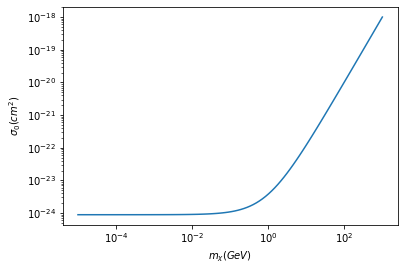

In [17]:
plt.loglog(m_chi, sigma_0)
plt.xlabel(r'$m_{\chi} (GeV)$')
plt.ylabel(r'$\sigma_0 (cm^2)$')

In [18]:
mw_satellite_data = pd.read_csv('maamari_2021_constraint.csv', header=None)

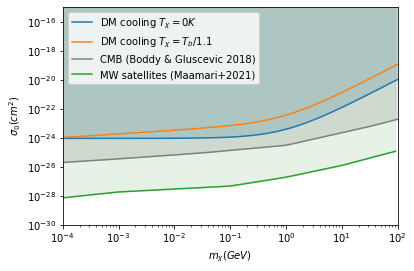

In [19]:
plt.loglog(m_chi, sigma_0, label=r'DM cooling $T_{\chi} = 0K$')
plt.fill_between(m_chi.value, sigma_0.value, y2=1e-15, alpha=0.2)

#plt.loglog (m_chi, sigma_0_10, label=r'DM cooling $T_{\chi} = T_b/10$')
#plt.loglog (m_chi, sigma_0_100, label=r'DM cooling $T_{\chi} = 1e-8K$')
#plt.loglog (m_chi, sigma_0_1000, label=r'DM cooling $T_{\chi} = T_b/1000$')
plt.loglog (m_chi, sigma_0_Tb, label=r'DM cooling $T_{\chi} = T_b/1.1$')

cmb_data = pd.read_csv('boddy_gluscevic_2018_cmb_constraint.csv', header=None)
plt.loglog(cmb_data[0],cmb_data[1], color='gray', label='CMB (Boddy & Gluscevic 2018)')
plt.fill_between(cmb_data[0],cmb_data[1], y2=1e-15, alpha=0.2, color='gray')
plt.xlabel(r'$m_{\chi} (GeV)$')
plt.ylabel(r'$\sigma_0 (cm^2)$')



plt.loglog(mw_satellite_data[0], mw_satellite_data[1], label=r'MW satellites (Maamari+2021)')
plt.fill_between(mw_satellite_data[0], mw_satellite_data[1], y2=1e-15, alpha=0.1, color='g')


plt.xlim(1e-4, 1e2)
plt.ylim(1e-30, 1e-15)
plt.legend()


In [20]:
def T_DM(m_chi, m_psi, f_chi, M=1e14*u.Msun, R = (1*u.Mpc).to(u.m)): # expression for obtaining T_DM = T_chi = T_psi as in Shoji 2023
    frac = (f_chi/m_chi + (1-f_chi)/m_psi)
    M_kg = M.to(u.kg)
    return (0.3*const.G*M_kg/(R*frac) * 1/const.c**2).to(u.GeV)

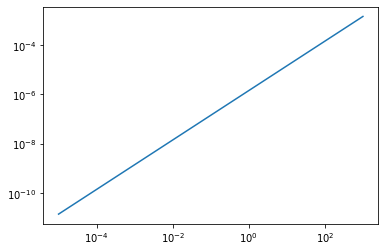

In [21]:
plt.loglog(m_chi, T_DM(m_chi, m_psi=0.1*u.GeV, f_chi=1))

Text(0.5, 0, '$f_{\\chi}$')

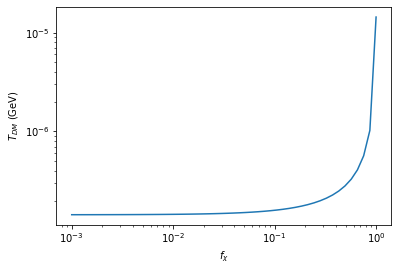

In [22]:
f_chi = np.logspace(-3, 0)
T_DM_vs_f_chi = T_DM(10*u.GeV, 0.1*u.GeV, f_chi)
#for f in f_chi:
 #   T_DM_vs_f_chi.append(T_DM(10*u.GeV, 1*u.GeV, f))#increasing f_chi increases T_DM
plt.loglog(f_chi, T_DM_vs_f_chi)
plt.ylabel(r'$T_{DM}$ (GeV)')
plt.xlabel(r'$f_{\chi}$')



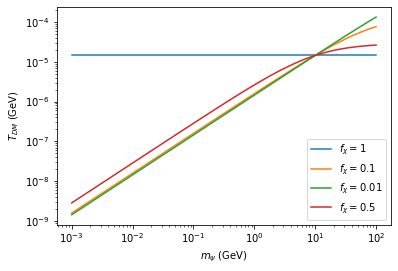

In [23]:
m_psi = np.logspace(-3, 2) * u.GeV
T_DM_vs_m_psi_0 = T_DM(10*u.GeV, m_psi, 1e0)
T_DM_vs_m_psi_1 = T_DM(10*u.GeV, m_psi, 1e-1)
T_DM_vs_m_psi_2 = T_DM(10*u.GeV, m_psi, 1e-2)
T_DM_vs_m_psi_50 = T_DM(10*u.GeV, m_psi, 0.5)
plt.loglog(m_psi, T_DM_vs_m_psi_0, label=r'$f_{\chi} = 1$')
plt.loglog(m_psi, T_DM_vs_m_psi_1, label=r'$f_{\chi} = 0.1$')
plt.loglog(m_psi, T_DM_vs_m_psi_2, label=r'$f_{\chi} = 0.01$')
plt.loglog(m_psi, T_DM_vs_m_psi_50, label=r'$f_{\chi} = 0.5$')
plt.ylabel(r'$T_{DM}$ (GeV)')
plt.xlabel(r'$m_{\psi}$ (GeV)')
plt.legend()

In [24]:
#sigma vs m_chi for scenario where there is one component of non interacting DM that is in equilibrium with IDM

def sigma_vs_m_chi_2_comp(m_chi, f_chi, m_psi, rho_dm=1e-3 * u.GeV/(u.cm)**3, n=0 ):    
    with u.set_enabled_equivalencies(u.mass_energy()):
        T_chi = T_DM(m_chi, m_psi, f_chi)
        uth = np.sqrt(T_b/m_b + T_chi/m_chi)
        rho_chi = rho_dm*f_chi
        numerator = Qh_dot * (m_chi+m_b)**2
        denominator = 3*(T_b-T_chi)*rho_chi*rho_b*V*c(n)*uth**((n+1)/2)*(const.c).to(u.cm/u.s)
        sigma_0 = numerator/denominator
        return sigma_0.to(u.cm**2), T_chi

In [25]:
# plot 2x2 subplots with f_chi = [0.1, 0.01] and m_psi = [1, 0.01]
data_0_0 = sigma_vs_m_chi_2_comp(m_chi, 0.5, 1*u.GeV)
data_1_0 = sigma_vs_m_chi_2_comp(m_chi, 0.01, 1*u.GeV)
data_0_1 = sigma_vs_m_chi_2_comp(m_chi, 0.5, 0.01*u.GeV)
data_1_1 = sigma_vs_m_chi_2_comp(m_chi, 0.01, 0.01*u.GeV)

ValueError: x and y must have same first dimension, but have shapes (100,) and (2, 100)

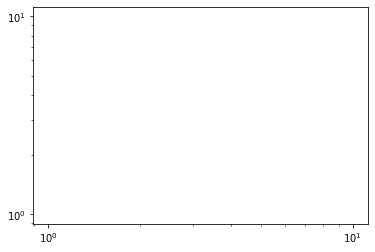

In [26]:
plt.loglog(m_chi, data_0_0, 'r', label='f_chi=0.5, m_psi=1 GeV') #row=0, col=0 
plt.loglog(m_chi, data_1_0, 'b', label='f_chi=0.01, m_psi=1 GeV') #row=1, col=0
plt.loglog(m_chi, data_0_1, 'g', label='f_chi=0.5, m_psi=0.01 GeV') #row=0, col=1
plt.loglog(m_chi, data_1_1, 'k', label='f_chi=0.01, m_psi=0.01 GeV') #row=1, col=1
plt.legend()
plt.xlabel(r'$m_{\chi} (GeV)$')
plt.ylabel(r'$\sigma_0 (cm^2)$')
plt.show()

In [ ]:
np.min(data_0_1)

In [25]:
# plot that shows acceptable parameter range in the fx vs mphi space that would give Tx < Tb for mx=10 GeV?
# need range of fx, range of mphi, plug in to T_DM and compare to T_B
n=500
f_chis = np.logspace(-6, 0, n)
m_psis = np.logspace(-6, 2, n)*u.GeV

mps, fxs = np.meshgrid(m_psis, f_chis)


In [26]:
print(fxs)

[[1.00000000e-06 1.00000000e-06 1.00000000e-06 ... 1.00000000e-06
  1.00000000e-06 1.00000000e-06]
 [1.02807322e-06 1.02807322e-06 1.02807322e-06 ... 1.02807322e-06
  1.02807322e-06 1.02807322e-06]
 [1.05693455e-06 1.05693455e-06 1.05693455e-06 ... 1.05693455e-06
  1.05693455e-06 1.05693455e-06]
 ...
 [9.46132376e-01 9.46132376e-01 9.46132376e-01 ... 9.46132376e-01
  9.46132376e-01 9.46132376e-01]
 [9.72693362e-01 9.72693362e-01 9.72693362e-01 ... 9.72693362e-01
  9.72693362e-01 9.72693362e-01]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]]


In [28]:
temperatures = np.zeros((n,n)) * u.GeV
Tx_below_Tb = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        temperatures[i, j] = T_DM(10*u.GeV, mps[i, j], fxs[i, j])
        Tx_below_Tb[i, j] = 1 if temperatures[i,j] < T_b else 0


In [29]:
#matrix = np.ma.masked_where(Tx_below_Tb == 0, Tx_below_Tb)
cmap=colors.ListedColormap(['gray', 'lightgreen'])
#cmap.set_bad(color='red')

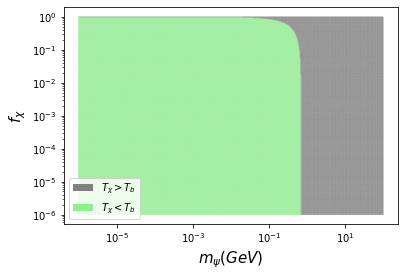

In [30]:
plt.scatter(mps, fxs, c=Tx_below_Tb, cmap=cmap, s=0.01)
ax=plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel(r'$m_{\psi} (GeV)$', size=15)
plt.ylabel(r'$f_{\chi}$', size=15)
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='gray',label=r'$T_{\chi}>T_b$'), 
                   Patch(facecolor='lightgreen',label=r'$T_{\chi}<T_b$')]
ax.legend(handles=legend_elements, loc='lower left')


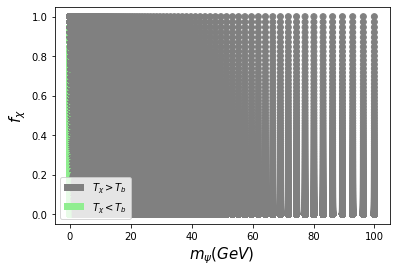

In [31]:
plt.scatter(mps, fxs, c=Tx_below_Tb, cmap=cmap)
ax=plt.gca()

plt.xlabel(r'$m_{\psi} (GeV)$', size=15)
plt.ylabel(r'$f_{\chi}$', size=15)
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='gray',label=r'$T_{\chi}>T_b$'), 
                   Patch(facecolor='lightgreen',label=r'$T_{\chi}<T_b$')]
ax.legend(handles=legend_elements, loc='lower left')


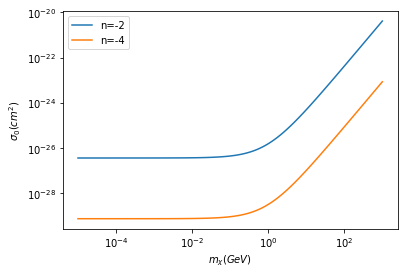

In [27]:
# sigma0 for n=-2, -4
sigma_0_vs_m_chi_n2 = sigma_vs_m_chi(m_chi, n=-2)
sigma_0_vs_m_chi_n4 = sigma_vs_m_chi(m_chi, n=-4) 
plt.loglog(m_chi, sigma_0_vs_m_chi_n2, label="n=-2")
plt.loglog(m_chi, sigma_0_vs_m_chi_n4, label="n=-4")
plt.xlabel(r'$m_{\chi} (GeV)$')
plt.ylabel(r'$\sigma_0 (cm^2)$')
plt.legend()

ValueError: x and y must have same first dimension, but have shapes (100,) and (2, 100)

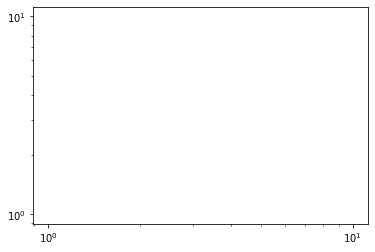

In [28]:
plt.loglog(m_chi, sigma_vs_m_chi_2_comp(m_chi, 0.1, 0.1*u.GeV, n=-2)) #constraint gets worse for fx=0.1
plt.xlabel(r'$m_{\chi} (GeV)$')
plt.ylabel(r'$\sigma_0 (cm^2)$')

Text(0.5, 1.0, 'n=-4')

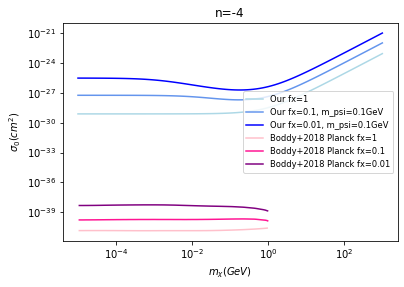

In [30]:
n4_fx1_s = sigma_vs_m_chi(m_chi, n=-4 )
n4_fx01_s, T_dm = sigma_vs_m_chi_2_comp(m_chi, 0.1, 0.1*u.GeV, rho_dm=1e-3 * u.GeV/(u.cm)**3, n=-4 )
n4_fx001_s, _ = sigma_vs_m_chi_2_comp(m_chi, 0.01, 0.1*u.GeV, rho_dm=1e-3 * u.GeV/(u.cm)**3, n=-4 )
plt.loglog(m_chi, n4_fx1_s, label="Our fx=1", color='lightblue')
plt.loglog(m_chi, n4_fx01_s, label="Our fx=0.1, m_psi=0.1GeV", color='cornflowerblue')
plt.loglog(m_chi, n4_fx001_s, label="Our fx=0.01, m_psi=0.1GeV", color='blue')


n4_fx1_data = pd.read_csv('boddy_gluscevic_2018_fx_1.csv', header=None)
n4_fx01_data = pd.read_csv('boddy_gluscevic_2018_fx_01.csv', header=None)
n4_fx001_data = pd.read_csv('boddy_gluscevic_2018_fx_001.csv', header=None)
plt.loglog(n4_fx1_data[0], n4_fx1_data[1], label="Boddy+2018 Planck fx=1", color='pink')
plt.loglog(n4_fx01_data[0], n4_fx01_data[1], label="Boddy+2018 Planck fx=0.1", color='deeppink')
plt.loglog(n4_fx001_data[0], n4_fx001_data[1], label="Boddy+2018 Planck fx=0.01", color='purple')
plt.xlabel(r'$m_{\chi} (GeV)$')
plt.ylabel(r'$\sigma_0 (cm^2)$')
plt.legend(loc='right', fontsize='small')
plt.title("n=-4")

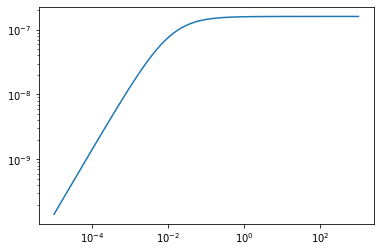

In [38]:
plt.loglog(m_chi, T_dm)